## Dependencies

In [1]:
from pretraining.autoencoder_loader import get_echonet_dataloader
from pretraining.train import train_autoencoder_3d
from pretraining.utils import visualize_random_video_from_loader
from pretraining.autoencoder import MobileNetV3AutoEncoder3D
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
lr = 1e-3
num_epochs = 500
patience=50

data_path = r"C:\Projects\python\echoframe\data\EchoNet-Dynamic\EchoNet-Dynamic"
model_path_1 = r'../models/self_trained_encoder.py'
log_path_1 = r'../logs/autoencoder.csv'
model_path_2 = r'../models/self_trained_encoder_masked.py'
log_path_2 = r'../logs/masked_autoencoder.csv'

train_loader = get_echonet_dataloader(data_path=data_path)
val_loader = get_echonet_dataloader(data_path,
                                    batch_size=4,
                                    split="val")
test_loader = get_echonet_dataloader(data_path=data_path,split='test')

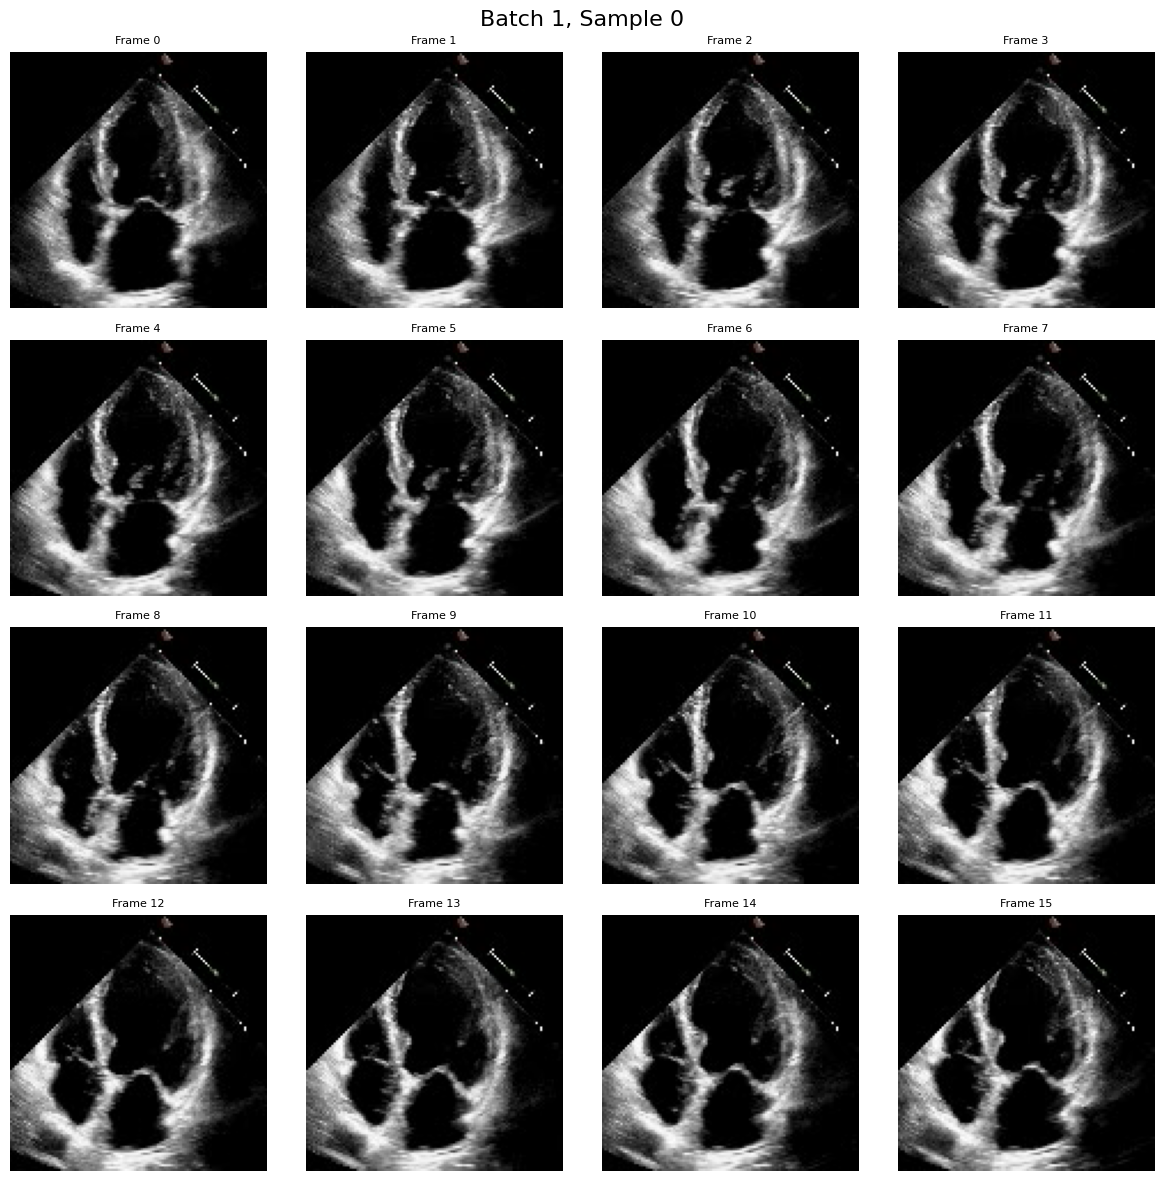

In [2]:
visualize_random_video_from_loader(train_loader)

## Model 2 - masked AutoEncoder

In [3]:
model_2 = MobileNetV3AutoEncoder3D()
train_autoencoder_3d(model=model_2,
                     train_loader=train_loader,
                     valid_loader=val_loader,
                     device=device,
                     lr=lr,
                     num_epochs=num_epochs,
                     log_path=log_path_2,
                     model_path=model_path_2,
                     patience=patience,
                     use_masked_loss=True)
del model_2
torch.cuda.empty_cache()


TypeError: ssim() got an unexpected keyword argument 'reduction'

## Model 1 - AutoEncoder

In [ ]:
model_1 = MobileNetV3AutoEncoder3D()
train_autoencoder_3d(model=model_1,
                     train_loader=train_loader,
                     valid_loader=val_loader,
                     device=device,
                     lr=lr,
                     num_epochs=num_epochs,
                     log_path=log_path_1,
                     model_path=model_path_1,
                     patience=patience)
del model_1
torch.cuda.empty_cache()


Epoch 1/500 | Train Loss: 0.009883 | Valid Loss: 0.005397 | Patience: 0


KeyboardInterrupt: 